In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import numpy as np

In [85]:
df = pd.read_csv('snsdata.zip')
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [86]:
X = df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)

In [87]:
X.shape

(30000, 36)

In [88]:
# Создание объекта StandardScaler и обучение на обучающей выборке
scaler = StandardScaler()
scaler.fit(X)

# Преобразование обучающей и тестовой выборок
X_norm = scaler.transform(X)
round(X_norm[0][0], 2)

-0.33

In [89]:
kmean = KMeans(n_clusters=9, random_state=42)
kmean.fit(X_norm)

c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=9, random_state=42)

In [90]:
kmean.inertia_

856276.696246784

In [91]:
X.loc[:, 'label'] = kmean.labels_
X.label.value_counts()

label
1    19599
2     4284
0     2201
4      941
3      902
5      851
8      754
7      467
6        1
Name: count, dtype: int64

In [92]:
df['cluster'] = kmean.predict(X_norm)
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,4


In [93]:
df['cluster'].value_counts()

cluster
1    19599
2     4284
0     2201
4      941
3      902
5      851
8      754
7      467
6        1
Name: count, dtype: int64

In [94]:
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

In [95]:
print(get_inertia(9, X_norm))

c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


856276.696246784


c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress

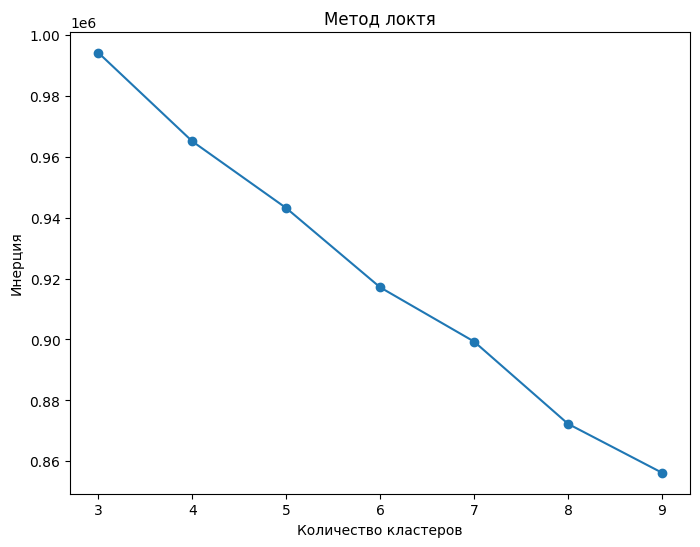

In [96]:
# список для сохранения значений инерции (сумма квадратов расстояний от каждой точки до её центроида)
inertia_values = []

# пробуем разное количество кластеров и сохраняем значения инерции
for k in range(3, 10):
    inertia_values.append(get_inertia(k, X_norm))

# визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(3, 10), inertia_values, marker='o', linestyle='-')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()


In [97]:
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(3, 10):
    silhouette.append(get_silhouette(clust_num, X_norm))

c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python 3.9.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress

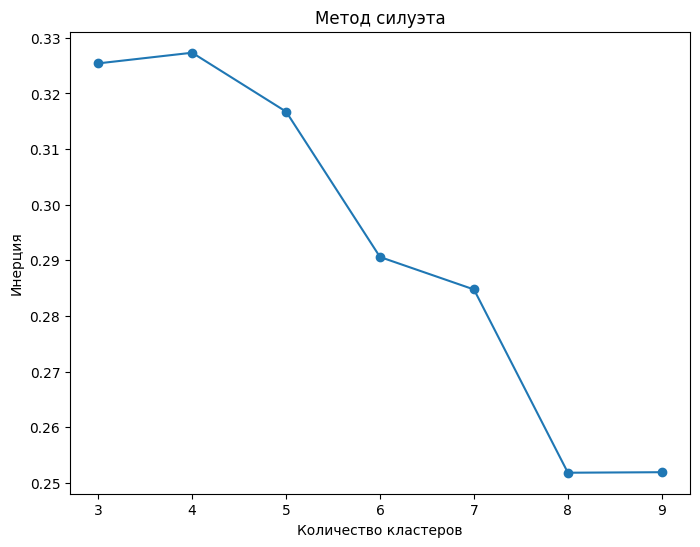

In [98]:
# визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(3, 10), silhouette, marker='o', linestyle='-')
plt.title('Метод силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

In [99]:
top_list = []
for label, group in X.groupby('label'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    top_5 = set(means.head(10).index)
    top_list.append(top_5)

set.intersection(*top_list)

{'god', 'hair'}

In [100]:
model = GaussianMixture(n_components=3, random_state=42)
predictions = model.fit_predict(X)
np.unique(predictions, return_counts=True)

(array([0, 1, 2], dtype=int64), array([23014,  1171,  5815], dtype=int64))

In [101]:
X['label'].value_counts()

label
1    19599
2     4284
0     2201
4      941
3      902
5      851
8      754
7      467
6        1
Name: count, dtype: int64

In [102]:
a = np.where(predictions == 2)
X.iloc[a]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,4
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,5
19,0,0,0,0,0,0,1,0,0,0,...,1,2,0,1,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29972,0,0,0,0,1,1,0,0,0,0,...,1,3,1,2,0,0,0,0,0,5
29979,0,3,0,0,0,0,1,0,2,1,...,1,1,0,0,0,1,1,1,1,4
29986,0,1,0,0,0,1,0,0,0,3,...,0,1,0,2,2,0,0,2,0,5
29987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
